# Algorithm Comparison in Disease Diagnosis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT LIBRARY AND DATASETS

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, classification_report

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Research Method Semester 4/dataset.csv')
df2=pd.read_csv('/content/drive/MyDrive/Research Method Semester 4/Symptom2Disease.csv')

# Data Exploration & Preprocessing

In [ ]:
df1.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(len(df1['Disease'].value_counts()))

41


In [ ]:
df2.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [ ]:
print(len(df2['label'].value_counts()))

24


In [ ]:
df2.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0


In [ ]:
df2.drop(['Unnamed: 0'], axis=1,inplace=True)

In [ ]:
def joinsymptoms(text):
    return ','.join(text.dropna().astype(str))

df1['text']=df1[df1.columns[1:]].apply(joinsymptoms,axis=1)

In [ ]:
delsymp=df1.drop(['Disease','text'],axis=1)

In [ ]:
df1=df1.drop(delsymp,axis=1)
df1

,Disease,text
0,Fungal infection,"itching, skin_rash, nodal_skin_eruptions, disc..."
1,Fungal infection,"skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,"itching, nodal_skin_eruptions, dischromic _pat..."
3,Fungal infection,"itching, skin_rash, dischromic _patches"
4,Fungal infection,"itching, skin_rash, nodal_skin_eruptions"
...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,"vomiting, headache, nausea, spinning_movement..."
4916,Acne,"skin_rash, pus_filled_pimples, blackheads, sc..."
4917,Urinary tract infection,"burning_micturition, bladder_discomfort, foul..."
4918,Psoriasis,"skin_rash, joint_pain, skin_peeling, silver_l..."


In [ ]:
df1.isnull().sum()

,0
Disease,0
text,0


In [ ]:
print(df1.columns)
print(df2.columns)
print(df1.shape)
print(df2.shape)

Index(['Disease', 'text'], dtype='object')
Index(['label', 'text'], dtype='object')
(4920, 2)
(1200, 2)


In [ ]:
df2.columns=(['Disease', 'text'])
df2.head()

,Disease,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [ ]:
def lower(text):
  tokens=text.lower()
  return tokens

df1['Disease']=df1['Disease'].apply(lower)
df2['Disease']=df2['Disease'].apply(lower)

In [ ]:
df1=pd.concat([df1,df2], ignore_index=True)
df1.shape
df1

,Disease,text
0,fungal infection,"itching, skin_rash, nodal_skin_eruptions, disc..."
1,fungal infection,"skin_rash, nodal_skin_eruptions, dischromic _..."
2,fungal infection,"itching, nodal_skin_eruptions, dischromic _pat..."
3,fungal infection,"itching, skin_rash, dischromic _patches"
4,fungal infection,"itching, skin_rash, nodal_skin_eruptions"
...,...,...
6115,diabetes,I'm shaking and trembling all over. I've lost ...
6116,diabetes,"Particularly in the crevices of my skin, I hav..."
6117,diabetes,I regularly experience these intense urges and...
6118,diabetes,"I have trouble breathing, especially outside. ..."


In [ ]:
for col in df1.columns:
  df1[col]=df1[col].str.replace('_',' ')

df1=df1.sample(frac=1, random_state=42)
df1

,Disease,text
2094,drug reaction,"itching, skin rash, stomach pain, burning mict..."
1612,urinary tract infection,"bladder discomfort, foul smell of urine, cont..."
5858,urinary tract infection,"I need to relieve myself regularly, but I can'..."
4294,varicose veins,"fatigue, cramps, bruising, obesity, swollen l..."
2571,heart attack,"vomiting, breathlessness, sweating, chest pain"
...,...,...
3772,fungal infection,"itching, skin rash, nodal skin eruptions, disc..."
5191,dengue,"I'm experiencing extreme body pain, headache a..."
5226,fungal infection,My skin has been itching a lot and developing ...
5390,dimorphic hemorrhoids,"Since I've been constipated, using the restroo..."


In [ ]:
print(len(df1['Disease'].value_counts()))

46


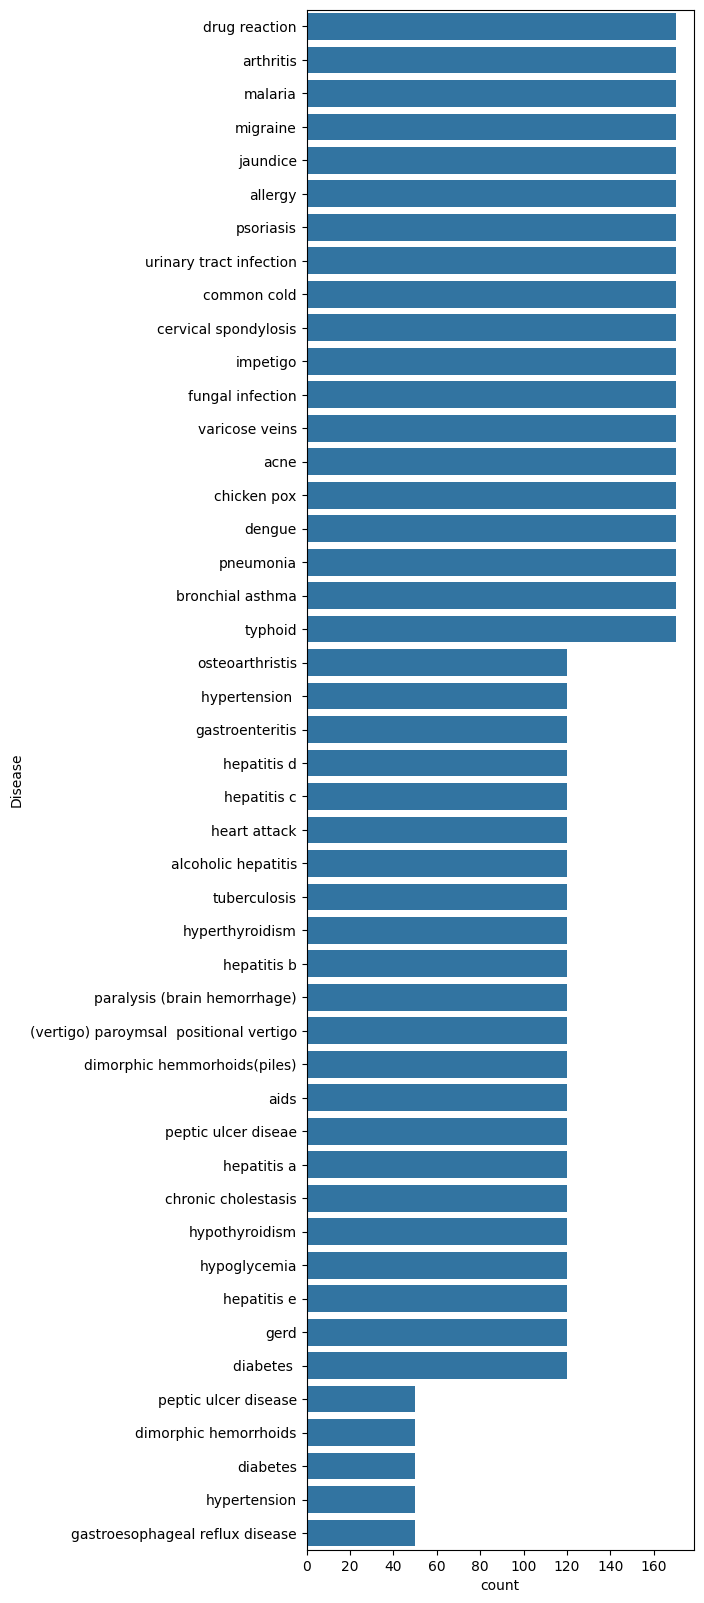

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(5,20))

sns.barplot(x=df1['Disease'].value_counts(), y=df1['Disease'].value_counts().index,width=0.8,ax=ax)
plt.show()

In [ ]:
from sklearn.utils import resample
# For each class in the target
df_balanced = pd.DataFrame()  # Empty DataFrame to store results
for class_value in df1['Disease'].unique():
    df_class = df1[df1['Disease'] == class_value]
    if len(df_class) < df1['Disease'].value_counts().max():
        df_class_resampled = resample(df_class,
                                      replace=True,
                                      n_samples=df1['Disease'].value_counts().max(),
                                      random_state=42)
    else:
        df_class_resampled = df_class
    df_balanced = pd.concat([df_balanced, df_class_resampled])

df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset
print(len(df_balanced['Disease'].value_counts()))


46


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc=WordCloud(width=1000, height=500, min_font_size=12)
wc.generate(''.join(df1['text']))

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wc)
plt.axis("off")
#plt.tight_layout(pad = 0)

plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
temp_df1=df1

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string

punct=string.punctuation
english_stopwords= stopwords.words('english')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    #print(tokens)
    #snowball_stemmer = SnowballStemmer('english')
    #tokens = [snowball_stemmer.stem(token.lower()) for token in tokens if token.isalpha() and token not in english_stopwords and token not in punct]
    tokens = [token.lower() for token in tokens if token.isalpha() and token not in english_stopwords and token not in punct]

    return ' '.join(tokens)

df1['text'] = df1['text'].apply(preprocess_text)
df1['text']


,text
2094,itching skin rash stomach pain burning micturi...
1612,bladder discomfort foul smell urine continuous...
5858,need relieve regularly ca seem get bladder emp...
4294,fatigue cramps bruising obesity swollen legs s...
2571,vomiting breathlessness sweating chest pain
...,...
3772,itching skin rash nodal skin eruptions dischro...
5191,experiencing extreme body pain headache vomiti...
5226,skin itching lot developing rash additionally ...
5390,since constipated using restroom quite challen...


In [ ]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df1['text'])

le=LabelEncoder()
y=le.fit_transform(df1['Disease'])


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(y_test)

[31 30  8 ...  7 35 29]


#Evaluation Function

In [ ]:
def evaluate(model,X_test,y_test):
  y_test_pred=model.predict(X_test)

  print(f'Confusion Matrix: {confusion_matrix(y_test,y_test_pred)}')
  print(f'Accuracy Score: {accuracy_score(y_test,y_test_pred)}')
  print(f'Precision Score: {precision_score(y_test,y_test_pred,average="micro")}')
  print(f'F1-Score: {f1_score(y_test,y_test_pred,average="weighted")}')
  print(f'Confusion Matrix: {confusion_matrix(y_test,y_test_pred)}')
  clf_report=pd.DataFrame(classification_report(y_test,y_test_pred,output_dict=True))
  print(f'Classification Report: {clf_report}')
  # print(f'Classification Report:\n {classification_report(y_test,y_test_pred)}')

# BERT

In [ ]:
!pip install transformers

In [ ]:
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer
import numpy as np

In [ ]:

temp_df1['Disease']=le.fit_transform(temp_df1['Disease'])
temp_df1['Disease'].value_counts()

In [ ]:
bertoken=BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
X_input_ids=np.zeros((len(temp_df1),256))
X_attn_msks=np.zeros((len(temp_df1),256))

In [ ]:
def generate_training_data(df,ids,masks, tokenizer):
  for i,text in tqdm(enumerate(df['text'])):
    tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
    ids[i, :] = tokenized_text.input_ids
    masks[i, :] = tokenized_text.attention_mask
  return ids, masks

In [ ]:
X_input_ids,X_attn_msks= generate_training_data(temp_df1,X_input_ids,X_attn_msks,bertoken)

In [ ]:
labels=np.zeros((len(temp_df1),46))
labels.shape

In [ ]:
labels[np.arange(len(temp_df1)),temp_df1['Disease'].values]=1
labels

In [ ]:
dataset=tf.data.Dataset.from_tensor_slices((X_input_ids,X_attn_msks,labels))

In [ ]:
dataset.take(1)

In [ ]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [ ]:
dataset=dataset.map(SentimentDatasetMapFunction)

In [ ]:
dataset.take(1)

In [ ]:
dataset=dataset.shuffle(10000).batch(16,drop_remainder=True)

In [ ]:
p=0.8
train_size=int((len(temp_df1)//16)*p)

In [ ]:
train_size

In [ ]:
train_dataset=dataset.take(train_size)
val_dataset=dataset.skip(train_size)

In [ ]:
from transformers import TFBertModel

In [ ]:
from transformers import TFAutoModel

In [ ]:
#!pip uninstall keras
#!pip install tensorflow==2.11

In [ ]:
bertmodel=TFBertModel.from_pretrained('bert-base-cased')


In [ ]:
input_ids=tf.keras.layers.Input(shape=(256,),name='input_ids', dtype='int32')
attention_masks=tf.keras.layers.Input(shape=(256,),name='attention_mask', dtype='int32')

bert_embds=bertmodel.bert(input_ids,attention_mask=attention_masks)[1]
intermediate_layer=tf.keras.layers.Dense(512, activation='relu',name='intermediate_layer')(bert_embds)
output_layer=tf.keras.layers.Dense(46, activation='softmax',name='output_layer')(intermediate_layer)

bertmodels=tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output_layer)
bertmodels.summary()

In [ ]:
#bertmodel=TFAutoModel.from_pretrained('bert-base-uncased')
#bertmodel.summary()

In [ ]:
optim=tf.keras.optimizers.Adam(learning_rate=1e-5)
loss_func=tf.keras.losses.CategoricalCrossentropy()
acc=tf.keras.metrics.CategoricalAccuracy('accuracy')

In [ ]:
bertmodels.compile(optimizer=optim, loss=loss_func,metrics=[acc])

In [ ]:
hist=bertmodels.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=1
)

In [ ]:
loaded_model=

# Naive Bayes

In [ ]:
nb=MultinomialNB()
bb=BernoulliNB()
gb=GaussianNB()

nb.fit(X_train,y_train)
bb.fit(X_train,y_train)
gb.fit(X_train.toarray(),y_train)

In [ ]:
print("Multinomial Naive Bayes")
evaluate(nb, X_test,y_test)
print('-------------------------------')
print("Bernoulli Naive Bayes")
evaluate(bb, X_test,y_test)
print('-------------------------------')
print("Gaussian Naive Bayes")
evaluate(gb, X_test.toarray(),y_test)
print('-------------------------------')

#Logistic Regression

In [ ]:
lr=LogisticRegression()

lr.fit(X_train,y_train)

In [ ]:
evaluate(lr,X_test,y_test)

#SVC

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)

In [ ]:
evaluate(svc,X_test,y_test)

#Voting Classifier

In [ ]:
models=[('nb', MultinomialNB()),
        ('rf',RandomForestClassifier()),
        ('lr', LogisticRegression()),
        ('svm',SVC(kernel='linear',probability=True))
       ]

In [ ]:
vc=VotingClassifier(estimators=models,voting='soft')

In [ ]:
vc.fit(X_train,y_train)

In [ ]:
y_pred=vc.predict(X_test)
print(le.inverse_transform(y_pred))

In [ ]:
sample_text='my arm is sore'

sample_text=preprocess_text(sample_text)
sample_text=tfidf.transform([sample_text])
predicted=le.inverse_transform(vc.predict(sample_text))

print(predicted)

In [ ]:
evaluate(vc, X_test,y_test)

#BOOSTING ALGORITHM

In [ ]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

xgbc=xgb.XGBClassifier(n_jobs=-1)
gbc=GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, random_state=100,max_features=5)

gbc.fit(X_train,y_train)
xgbc.fit(X_train,y_train)


In [ ]:
xgbc.predict(X_test)

evaluate(xgbc, X_test,y_test)

In [ ]:
gbc.predict(X_test)

evaluate(gbc,X_test,y_test)

Bagging

#**Random Forest**

In [ ]:
rfc=RandomForestClassifier(n_estimators=20, random_state=42)
rfc.fit(X_train,y_train)

In [ ]:
evaluate(rfc,X_train,y_train)

#**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators = 20, random_state = 42)
clf.fit(X_train, y_train)

#models.append(clf)
#scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

In [ ]:
evaluate(clf,X_test,y_test)

#**RNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GlobalAveragePooling1D

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['text'])

sequences = tokenizer.texts_to_sequences(df1['text'])

max_len = max([len(seq) for seq in sequences])
sequences_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

In [ ]:
y.shape

In [ ]:
X_rnn_train, X_rnn_test, y_rnn_train, y_rnn_test = train_test_split(sequences_padded, y, test_size=0.2, random_state=42)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    SimpleRNN(64, return_sequences=True),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


In [ ]:
model.fit(X_rnn_train, y_rnn_train, epochs=10, validation_data=(X_rnn_test, y_rnn_test), verbose=2)


In [ ]:
y_rnn_test.shape

In [ ]:
X_rnn_test.shape

In [ ]:
y_rnn_pred.shape

In [ ]:
def evaluate_rnn(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')

evaluate_rnn(model, X_rnn_test, y_rnn_test)


In [ ]:
y_rnn_pred=model.predict(X_rnn_test,verbose=0)


In [ ]:
# print(f'Accuracy: {accuracy_score(y_rnn_test,y_rnn_pred)}')

In [ ]:
y_rnn_pred.shape

In [ ]:
y_rnn_test.shape

In [ ]:
model.metrics_names

In [ ]:
from ast import arg
met = tf.keras.metrics.F1Score(threshold=0.5)
met.update_state(y_rnn_test,y_rnn_pred)
result = met.result()
result

In [ ]:
symp=input('INPUT YOUR SYMPTOMS HERE')

predicting=rfc.predict(symp)
print(f'your predicted disease is : {predicting}')

In [ ]:
print('Patient #123')
print('Name : Albert Tanubrata')
print('Age : 20 Years Old')
print('Symptoms : I have a really bad cough and fever lately')
print('Predicted Disease : Common Cold ')